In [1]:
import glob
import nappy

In [2]:
# get all na files
path = './aircraft_data/*.na'
na_file_dirs = glob.glob(path)
print(na_file_dirs)

['./aircraft_data/he20000828_clr.na', './aircraft_data/he20000828_ds001.na', './aircraft_data/he20000828_ds002.na', './aircraft_data/he20000828_ds003.na', './aircraft_data/he20000828_ds004.na', './aircraft_data/he20000828_ds005.na', './aircraft_data/he20000828_ds006.na', './aircraft_data/he20000828_ds007.na', './aircraft_data/he20000828_ds008.na', './aircraft_data/he20000828_ds009.na', './aircraft_data/he20000828_ds010.na', './aircraft_data/he20000828_ds011.na', './aircraft_data/he20000828_ds012.na', './aircraft_data/he20000828_ds013.na', './aircraft_data/he20000828_ds014.na', './aircraft_data/he20000828_ds015.na', './aircraft_data/he20000828_ds016.na', './aircraft_data/he20000828_ds017.na', './aircraft_data/he20000828_ds018.na', './aircraft_data/he20000828_ds019.na', './aircraft_data/he20000828_ds020.na', './aircraft_data/he20000828_ds021.na', './aircraft_data/he20000828_ds022.na', './aircraft_data/he20000828_ds023.na', './aircraft_data/he20000828_ds024.na', './aircraft_data/he2000082

In [3]:
example_file = nappy.openNAFile(na_file_dirs[0])

In [4]:
example_file.getNADict()

{'DATE': [2000, 8, 28],
 'DX': [1.0],
 'FFI': 1001,
 'IVOL': 1,
 'MNAME': 'CRIT POINT   flight A780',
 'NCOM': ['METHOD     PARA(1)=Upward facing pyranometer (hemispheric field of view)',
  'INSTRUMENT PARA(1)=Eppley PSP (0.3 to 3 micrometers: WG295 Clear dome)',
  'METHOD     PARA(2)=Downward facing pyranometer (hemispheric field of view)',
  'INSTRUMENT PARA(2)=Eppley PSP (0.3 to 3 micrometers: WG295 Clear dome)',
  'Accuracy +/-3% for direct irradiance; +/-2% for diffuse irradiance',
  'Range - 40 to 1400 W/m2; Resolution 0.35 W/m2',
  'Accuracies given are approx: email for info',
  'Flight data to be used in conjunction with log: he20000828_summary.txt',
  'DATA AVERAGING : No averaging',
  'THIS-FILE-NAME = he20000828_clr.na',
  'THIS-FILE-VERSION = 1.0',
  'THIS-FILE-ENDS = 2000 08 28',
  'E-MAIL-CONTACT = arasf@nerc.ac.uk',
  'ERROR FLAG 0 =VALID',
  'ERROR FLAG 1 =REDUCED QUALITY',
  'ERROR FLAG 2 =LIKELY TO BE WRONG',
  'ERROR FLAG 3 =INVALID OR MISSING',
  'Created on 15-FEB

In [5]:
CREATE_NC_FILES = False
if CREATE_NC_FILES:
    import subprocess # na2nc -i he20000828_ds001.na -o he20000828_ds001.na 
    time_units = 'Elapsed UTs from 0hrs on 2000 08 28'
    for path in na_file_dirs:
        filedest = path[0:-3] + '.nc' # take out the .na and replace with .nc
        subprocess_to_run = ['na2nc', '-i', path, '-o', filedest, '-t', time_units]
        subprocess.run(subprocess_to_run)
    print("\nSubprocess end!")

In [171]:
# inspect how xarray and the na2nc conversion has worked
import xarray
ds = list([xarray.open_mfdataset(f) for f in glob.glob('./aircraft_data/*.nc')])
ds[0] # check first read value, for a shorter output cell

<xarray.Dataset>
Dimensions:                              (
                                          elapsed_uts_from_0hrs_on_2000_08_28: 33121)
Coordinates:
  * elapsed_uts_from_0hrs_on_2000_08_28  (elapsed_uts_from_0hrs_on_2000_08_28) float64 ...
Data variables:
    corr_upper_clr_flux                  (elapsed_uts_from_0hrs_on_2000_08_28) float64 dask.array<chunksize=(33121,), meta=np.ndarray>
    error_flag                           (elapsed_uts_from_0hrs_on_2000_08_28) float64 dask.array<chunksize=(33121,), meta=np.ndarray>
    corr_lower_clr_flux                  (elapsed_uts_from_0hrs_on_2000_08_28) float64 dask.array<chunksize=(33121,), meta=np.ndarray>
Attributes:
    no_of_nasa_ames_header_lines:  82
    file_format_index:             1001
    institution:                   ARASF / MRF (ONAME from NASA Ames file); M...
    source:                        C-130 Clear Dome Broad Band Radiometers
    title:                         CRIT POINT   flight A780
    file_number_in_set:            1
    total_files_in_set:            1
    history:                       2001-02-15 - NASA Ames File created/revise...
    first_valid_date_of_data:      [2000    8   28]
    comment:                       ==== Special Comments follow ====\nRADIOME...

https://help.ceda.ac.uk/article/4692-nasa-ames
http://cedadocs.ceda.ac.uk/73/4/Ex1001.html

In [113]:
data_list = []
with open('./aircraft_data/he20000828_ds001.na') as f:
    file_lines = f.readlines()
    header_line_count = int(file_lines[0].split(' ')[0])
    data_lines = file_lines[header_line_count:]
    for line in data_lines:
        separated_data = line.split()
        data_list.append(separated_data)
import pandas as pd
import numpy as np
df = pd.DataFrame(data_list)
df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,27579.2,2,00,838.25,0,26.10,0,26.24,0,999.00,...,999.00000,3,99.00000,3,1299.69,0,99,3,99,3
1,27579.7,2,00,838.20,0,26.10,0,27.80,0,999.00,...,999.00000,3,99.00000,3,1300.25,0,99,3,99,3
2,27580.2,2,10,838.03,0,26.53,0,27.46,0,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
3,27580.7,2,10,815.67,0,20.38,0,29.84,0,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
4,27581.2,2,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,28113.7,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
1070,28114.2,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
1071,28114.7,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
1072,28115.2,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3


Now, some more manual formatting of the data is required, based on the headers we shall take the error values, and replace with NaN, and column that data to match it's actual value

for example the names of the variables will be extracted with hard-coded indices for the data lines as follows:

In [129]:
with open('./aircraft_data/he20000828_ds001.na') as f:
    file_lines = f.readlines()
    
    data_column_names = file_lines[12:36]
    data_column_names = list(map(str.strip, data_column_names))
    print(data_column_names)
# again, hardcoding is required as 24 lines exist in the variables for header files, however 25 columns exist in the data, we can find that the missing column is the first one, time
time_variable = ['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)']
data_column_names = time_variable + data_column_names
df.columns = data_column_names
df

['data identifier', 'error flag   (data identifier)', 'air pressure(mb)', 'error flag   (air pressure)', 'air temperature(degC)', 'error flag   (air temperature)', 'relative humidity(%)', 'error flag   (relative humidity)', 'wind direction(deg)', 'error flag   (wind direction)', 'wind speed(m/s)', 'wind error(m/s)', 'vertical velocity of sonde(m/s)', 'error flag   (vertical velocity of sonde)', 'gps longitude(deg)', 'error flag   (gps longitude)', 'GPS latitude(deg)', 'error flag   (GPS latitude)', 'Geopotential altitude(m)', 'error flag   (Geopotential altitude)', 'no. of satellites in GPS wind', 'error flag   (no. of satellites in GPS wind)', 'no. of satellites tracked by sonde', 'error flag   (no. of satellites tracked by sonde)']


,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd),data identifier,error flag (data identifier),air pressure(mb),error flag (air pressure),air temperature(degC),error flag (air temperature),relative humidity(%),error flag (relative humidity),wind direction(deg),...,gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude),no. of satellites in GPS wind,error flag (no. of satellites in GPS wind),no. of satellites tracked by sonde,error flag (no. of satellites tracked by sonde)
0,27579.2,2,00,838.25,0,26.10,0,26.24,0,999.00,...,999.00000,3,99.00000,3,1299.69,0,99,3,99,3
1,27579.7,2,00,838.20,0,26.10,0,27.80,0,999.00,...,999.00000,3,99.00000,3,1300.25,0,99,3,99,3
2,27580.2,2,10,838.03,0,26.53,0,27.46,0,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
3,27580.7,2,10,815.67,0,20.38,0,29.84,0,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
4,27581.2,2,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,28113.7,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
1070,28114.2,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
1071,28114.7,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3
1072,28115.2,3,10,9999.00,3,99.00,3,999.00,3,999.00,...,999.00000,3,99.00000,3,99999.00,3,99,3,99,3


In [130]:
# now, replace error coded values with
error_flag_var_boolean = df.columns.str.contains('error flag')
print(error_flag_var_boolean)

[False False  True False  True False  True False  True False  True False
 False False  True False  True False  True False  True False  True False
  True]


In [137]:
df_error_flags = df.loc[:, error_flag_var_boolean]
good_data_mask = df_error_flags=='3'
good_data_mask

,error flag (data identifier),error flag (air pressure),error flag (air temperature),error flag (relative humidity),error flag (wind direction),error flag (vertical velocity of sonde),error flag (gps longitude),error flag (GPS latitude),error flag (Geopotential altitude),error flag (no. of satellites in GPS wind),error flag (no. of satellites tracked by sonde)
0,False,False,False,False,True,True,True,True,False,True,True
1,False,False,False,False,True,True,True,True,False,True,True
2,False,False,False,False,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1069,False,True,True,True,True,True,True,True,True,True,True
1070,False,True,True,True,True,True,True,True,True,True,True
1071,False,True,True,True,True,True,True,True,True,True,True
1072,False,True,True,True,True,True,True,True,True,True,True


In [138]:
#move the mask to the data the flag corresponds to (shift the data left once by removing element 0, and inseting false to end of array)
flag_to_data = np.concatenate((error_flag_var_boolean[1:], [False]))
print(flag_to_data)

[False  True False  True False  True False  True False  True False False
 False  True False  True False  True False  True False  True False  True
 False]


In [139]:
df_data = df.loc[:, flag_to_data]
df_data

,data identifier,air pressure(mb),air temperature(degC),relative humidity(%),wind direction(deg),vertical velocity of sonde(m/s),gps longitude(deg),GPS latitude(deg),Geopotential altitude(m),no. of satellites in GPS wind,no. of satellites tracked by sonde
0,2,838.25,26.10,26.24,999.00,999.00,999.00000,99.00000,1299.69,99,99
1,2,838.20,26.10,27.80,999.00,999.00,999.00000,99.00000,1300.25,99,99
2,2,838.03,26.53,27.46,999.00,999.00,999.00000,99.00000,99999.00,99,99
3,2,815.67,20.38,29.84,999.00,999.00,999.00000,99.00000,99999.00,99,99
4,2,9999.00,99.00,999.00,999.00,999.00,999.00000,99.00000,99999.00,99,99
...,...,...,...,...,...,...,...,...,...,...,...
1069,3,9999.00,99.00,999.00,999.00,999.00,999.00000,99.00000,99999.00,99,99
1070,3,9999.00,99.00,999.00,999.00,999.00,999.00000,99.00000,99999.00,99,99
1071,3,9999.00,99.00,999.00,999.00,999.00,999.00000,99.00000,99999.00,99,99
1072,3,9999.00,99.00,999.00,999.00,999.00,999.00000,99.00000,99999.00,99,99


In [140]:
good_data_mask

,error flag (data identifier),error flag (air pressure),error flag (air temperature),error flag (relative humidity),error flag (wind direction),error flag (vertical velocity of sonde),error flag (gps longitude),error flag (GPS latitude),error flag (Geopotential altitude),error flag (no. of satellites in GPS wind),error flag (no. of satellites tracked by sonde)
0,False,False,False,False,True,True,True,True,False,True,True
1,False,False,False,False,True,True,True,True,False,True,True
2,False,False,False,False,True,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
1069,False,True,True,True,True,True,True,True,True,True,True
1070,False,True,True,True,True,True,True,True,True,True,True
1071,False,True,True,True,True,True,True,True,True,True,True
1072,False,True,True,True,True,True,True,True,True,True,True


In [152]:
#select the columns of the adjusted mask
df_data = df.loc[:, flag_to_data]
df_data.apply(pd.to_numeric)
good_data_mask.columns = df_data.columns
nan_df = df_data.mask(good_data_mask, other=np.NaN)
df.loc[:,nan_df.columns] = nan_df
df

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd),data identifier,error flag (data identifier),air pressure(mb),error flag (air pressure),air temperature(degC),error flag (air temperature),relative humidity(%),error flag (relative humidity),wind direction(deg),...,gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude),no. of satellites in GPS wind,error flag (no. of satellites in GPS wind),no. of satellites tracked by sonde,error flag (no. of satellites tracked by sonde)
0,27579.2,2,00,838.25,0,26.10,0,26.24,0,NaN,...,NaN,3,NaN,3,1299.69,0,NaN,3,NaN,3
1,27579.7,2,00,838.20,0,26.10,0,27.80,0,NaN,...,NaN,3,NaN,3,1300.25,0,NaN,3,NaN,3
2,27580.2,2,10,838.03,0,26.53,0,27.46,0,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
3,27580.7,2,10,815.67,0,20.38,0,29.84,0,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
4,27581.2,2,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,28113.7,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
1070,28114.2,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
1071,28114.7,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
1072,28115.2,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3


OK, so let's try to see the flight path of the aircraft, by plotting the altitude and lon lat of the aircraft, we get the data from our DataFrame and remove all the rows where one of these three values in NaN (since time is the independent variable, it is always correct)

In [155]:
cols_to_get = ['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)', 'GPS latitude(deg)', 'gps longitude(deg)', 'Geopotential altitude(m)']
plot_aircraft_df = df[cols_to_get]
plot_aircraft_df = plot_aircraft_df.dropna()
plot_aircraft_df

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd),GPS latitude(deg),gps longitude(deg),Geopotential altitude(m)


we have no data to plot that fits these constraints.

next, lets count the NaN values and see if we can make a 2d plot, maybe one column has more NaNs than the other

In [161]:
plot_aircraft_df = df[cols_to_get] #reset the dataframe
print("Unique values:", plot_aircraft_df[cols_to_get[1:]].nunique())

Unique values: GPS latitude(deg)             0
gps longitude(deg)            0
Geopotential altitude(m)    866
dtype: int64


So, in this data, lon and lat from the gps were never reported

In [163]:
plot_aircraft_df = plot_aircraft_df[plot_aircraft_df['Geopotential altitude(m)'].notna()]
plot_aircraft_df

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd),GPS latitude(deg),gps longitude(deg),Geopotential altitude(m)
0,27579.2,NaN,NaN,1299.69
1,27579.7,NaN,NaN,1300.25
8,27583.2,NaN,NaN,1304.41
9,27583.7,NaN,NaN,1305.01
10,27584.2,NaN,NaN,1305.65
...,...,...,...,...
966,28062.2,NaN,NaN,-92.40
975,28066.7,NaN,NaN,-93.27
980,28069.2,NaN,NaN,99999.00
986,28072.2,NaN,NaN,-91.86


99999.00 value suggests that not all of the invalid data was turned to NaN, is this a mistake of the method or the error flag?

The index on the dataframe hasn't been reset, we can view the error flag for a 99999.00 value that wasn't converted:

In [176]:
print("Row entry:\n\n", df.loc[999])
print("\n\nAltitude Value:", df.loc[999]['Geopotential altitude(m)'],"and Altitude Flag:", df.loc[999]['error flag   (Geopotential altitude)'])

Row entry:

 time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)     28078.7
data identifier                                                       3
error flag   (data identifier)                                       10
air pressure(mb)                                                 240.72
error flag   (air pressure)                                           2
air temperature(degC)                                            -50.27
error flag   (air temperature)                                        2
relative humidity(%)                                                NaN
error flag   (relative humidity)                                      3
wind direction(deg)                                                 NaN
error flag   (wind direction)                                         3
wind speed(m/s)                                                  999.00
wind error(m/s)                                                   99.00
vertical velocity of sonde(m/s)                    

So, the metadata comments in the file itself has error flag as: ERROR FLAG 2 = PTU or GPS errors, sensor not stabilised or data clearly wrong
Error flag 2 data should then be converted to NaN as something is wrong with the entry. Lets do the same as before but with error 2 instead of 3:

In [177]:
#move the mask to the data the flag corresponds to
df_error_flags = df.loc[:, error_flag_var_boolean]
good_data_mask = df_error_flags=='2'
flag_to_data = np.concatenate((error_flag_var_boolean[1:], [False]))
df_data = df.loc[:, flag_to_data]
df_data.apply(pd.to_numeric)
good_data_mask.columns = df_data.columns
nan_df = df_data.mask(good_data_mask, other=np.NaN)
df.loc[:,nan_df.columns] = nan_df
df

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd),data identifier,error flag (data identifier),air pressure(mb),error flag (air pressure),air temperature(degC),error flag (air temperature),relative humidity(%),error flag (relative humidity),wind direction(deg),...,gps longitude(deg),error flag (gps longitude),GPS latitude(deg),error flag (GPS latitude),Geopotential altitude(m),error flag (Geopotential altitude),no. of satellites in GPS wind,error flag (no. of satellites in GPS wind),no. of satellites tracked by sonde,error flag (no. of satellites tracked by sonde)
0,27579.2,2,00,838.25,0,26.10,0,26.24,0,NaN,...,NaN,3,NaN,3,1299.69,0,NaN,3,NaN,3
1,27579.7,2,00,838.20,0,26.10,0,27.80,0,NaN,...,NaN,3,NaN,3,1300.25,0,NaN,3,NaN,3
2,27580.2,2,10,838.03,0,26.53,0,27.46,0,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
3,27580.7,2,10,815.67,0,20.38,0,29.84,0,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
4,27581.2,2,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,28113.7,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
1070,28114.2,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
1071,28114.7,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3
1072,28115.2,3,10,NaN,3,NaN,3,NaN,3,NaN,...,NaN,3,NaN,3,NaN,3,NaN,3,NaN,3


And regenerate our NaN removed altitude dataframe (lon, lat unnecessary since no values exist)

In [182]:
cols_to_get = ['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)','Geopotential altitude(m)']
plot_aircraft_df = df[df[cols_to_get]['Geopotential altitude(m)'].notna()]
plot_aircraft_df = plot_aircraft_df[cols_to_get]
plot_aircraft_df

,time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd),Geopotential altitude(m)
0,27579.2,1299.69
1,27579.7,1300.25
8,27583.2,1304.41
9,27583.7,1305.01
10,27584.2,1305.65
...,...,...
952,28055.2,-92.72
954,28056.2,-92.35
966,28062.2,-92.40
975,28066.7,-93.27


OK, now to plot altitude over time, we cast the pandas columns (series)

In [195]:
plot_aircraft_df = plot_aircraft_df.apply(pd.to_numeric)
print(list(plot_aircraft_df['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)']))

[27579.2, 27579.7, 27583.2, 27583.7, 27584.2, 27584.7, 27585.2, 27585.7, 27586.2, 27586.7, 27587.2, 27587.7, 27588.2, 27588.7, 27589.7, 27590.2, 27590.7, 27591.2, 27592.2, 27593.2, 27593.7, 27594.2, 27595.2, 27596.7, 27597.2, 27597.7, 27598.2, 27598.7, 27599.7, 27600.7, 27601.2, 27602.2, 27602.7, 27603.2, 27603.7, 27604.7, 27607.7, 27608.2, 27608.7, 27609.2, 27609.7, 27610.2, 27610.7, 27611.2, 27611.7, 27612.2, 27612.7, 27613.2, 27613.7, 27614.2, 27614.7, 27615.2, 27615.7, 27616.2, 27616.7, 27617.2, 27617.7, 27618.2, 27618.7, 27619.2, 27619.7, 27620.2, 27620.7, 27621.2, 27621.7, 27622.2, 27622.7, 27623.2, 27623.7, 27624.2, 27624.7, 27625.2, 27625.7, 27626.2, 27626.7, 27627.2, 27627.7, 27628.2, 27628.7, 27629.2, 27629.7, 27630.2, 27630.7, 27631.2, 27631.7, 27632.2, 27632.7, 27633.2, 27633.7, 27634.2, 27634.7, 27635.2, 27635.7, 27636.2, 27636.7, 27637.2, 27637.7, 27638.2, 27638.7, 27639.2, 27639.7, 27640.2, 27640.7, 27641.2, 27641.7, 27642.2, 27642.7, 27643.2, 27643.7, 27644.2, 27644.7, 

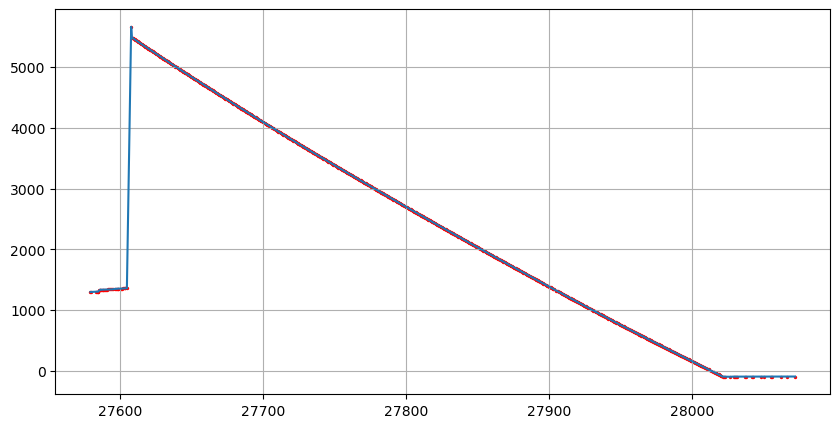

In [208]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(list(plot_aircraft_df['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)']), list(plot_aircraft_df['Geopotential altitude(m)']), label="Altitude")
ax.scatter(list(plot_aircraft_df['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)']), list(plot_aircraft_df['Geopotential altitude(m)']), s=2, c='red')
# plt.legend()
plt.grid()
plt.show()
# print(list(plot_aircraft_df['Geopotential altitude(m)']))
# plot_aircraft_df['Geopotential altitude(m)']

In [215]:
#interesting jump, lets check the time between the jump
print(list(plot_aircraft_df['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-m-dd)'])[30:40])
print(list(plot_aircraft_df['Geopotential altitude(m)'])[30:40])
# 3 seconds the geopotential altitude jumped by about 4300m

[27601.2, 27602.2, 27602.7, 27603.2, 27603.7, 27604.7, 27607.7, 27608.2, 27608.7, 27609.2]
[1356.16, 1357.41, 1357.85, 1358.97, 1358.52, 1360.82, 5664.34, 5486.46, 5479.64, 5473.0]


In [219]:
%%time
# try to bring all of the data together into one DF to try and understand what corresponds to where
df_list = []
for na_file in na_file_dirs:
    print("Start file:", na_file)
    data_list = []
    with open(na_file) as f:
        file_lines = f.readlines()
        header_line_count = int(file_lines[0].split(' ')[0])
        data_lines = file_lines[header_line_count:]
        for line in data_lines:
            separated_data = line.split()
            data_list.append(separated_data)
    df=pd.DataFrame(data_list)
    df['File_Name'] = na_file
    df_list.append(df)

Start file: ./aircraft_data/he20000828_clr.na
Start file: ./aircraft_data/he20000828_ds001.na
Start file: ./aircraft_data/he20000828_ds002.na
Start file: ./aircraft_data/he20000828_ds003.na
Start file: ./aircraft_data/he20000828_ds004.na
Start file: ./aircraft_data/he20000828_ds005.na
Start file: ./aircraft_data/he20000828_ds006.na
Start file: ./aircraft_data/he20000828_ds007.na
Start file: ./aircraft_data/he20000828_ds008.na
Start file: ./aircraft_data/he20000828_ds009.na
Start file: ./aircraft_data/he20000828_ds010.na
Start file: ./aircraft_data/he20000828_ds011.na
Start file: ./aircraft_data/he20000828_ds012.na
Start file: ./aircraft_data/he20000828_ds013.na
Start file: ./aircraft_data/he20000828_ds014.na
Start file: ./aircraft_data/he20000828_ds015.na
Start file: ./aircraft_data/he20000828_ds016.na
Start file: ./aircraft_data/he20000828_ds017.na
Start file: ./aircraft_data/he20000828_ds018.na
Start file: ./aircraft_data/he20000828_ds019.na
Start file: ./aircraft_data/he20000828_ds0

In [220]:
#let's look for duplicate timestamps, since all files 0th column is time
large_df = pd.concat(df_list)
large_df

,0,1,2,3,4,File_Name,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,25680,107.875793,0,63.2105713,0,./aircraft_data/he20000828_clr.na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25681,108.235291,0,63.6540833,0,./aircraft_data/he20000828_clr.na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25682,107.875793,0,68.0895691,0,./aircraft_data/he20000828_clr.na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25683,107.516327,0,75.3476257,0,./aircraft_data/he20000828_clr.na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25684,107.516327,0,79.3395691,0,./aircraft_data/he20000828_clr.na,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059867,58800.843750,1.82885742,0,-2.46240234,0,./aircraft_data/he20000828_wnd.na,3.46215868,2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059868,58800.875000,1.87573242,0,-1.93432617,0,./aircraft_data/he20000828_wnd.na,2.40063477,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059869,58800.906250,2.16894531,0,-2.30078125,0,./aircraft_data/he20000828_wnd.na,2.41479492,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1059870,58800.937500,2.20678711,0,-2.88891602,0,./aircraft_data/he20000828_wnd.na,2.63867188,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [256]:
large_df = large_df.rename(columns = {0:'Time'})
large_df['Time'] = pandas.to_numeric(large_df['Time'])
large_df = large_df.sort_values('Time')
large_df = large_df.reset_index()
large_df

,index,Time,1,2,3,4,File_Name,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,0,707.000000,2,00,852.93,0,./aircraft_data/he20000828_ds030.na,23.46,0,10.26,...,999.00000,3,99.00000,3,1036.12,0,99,3,99,3
1,1,708.000000,3,00,431.68,0,./aircraft_data/he20000828_ds030.na,-13.20,0,28.28,...,1.77439,0,17.00160,0,6597.63,0,5,0,5,0
2,2,709.000000,3,00,492.27,0,./aircraft_data/he20000828_ds030.na,-7.60,0,25.60,...,1.77359,0,17.00256,0,5585.79,0,6,0,6,0
3,3,710.000000,3,00,556.43,0,./aircraft_data/he20000828_ds030.na,-3.20,0,21.48,...,1.77101,0,17.00438,0,4624.91,0,7,0,7,0
4,4,711.000000,3,00,627.26,0,./aircraft_data/he20000828_ds030.na,3.41,0,44.43,...,1.76963,0,17.00883,0,3666.93,0,8,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618372,2119741,58800.953125,999,3,NaN,NaN,./aircraft_data/he20000828_tw1.na,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618373,1059871,58800.968750,975.086182,0,306.687744,0,./aircraft_data/he20000828_tmp.na,306.689941,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618374,1059871,58800.968750,2.32983398,0,-2.53417969,0,./aircraft_data/he20000828_wnd.na,2.30419922,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4618375,2119742,58800.968750,999,3,NaN,NaN,./aircraft_data/he20000828_tw1.na,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [257]:
for row, i in large_df.iterrows():
    if(row > 20):
        break
    if(i['File_Name'] != './aircraft_data/he20000828_wnd.na'):
        print(i['Time'], i['File_Name'], row)

707.0 ./aircraft_data/he20000828_ds030.na 0
708.0 ./aircraft_data/he20000828_ds030.na 1
709.0 ./aircraft_data/he20000828_ds030.na 2
710.0 ./aircraft_data/he20000828_ds030.na 3
711.0 ./aircraft_data/he20000828_ds030.na 4
712.0 ./aircraft_data/he20000828_ds030.na 5
713.0 ./aircraft_data/he20000828_ds030.na 6
714.0 ./aircraft_data/he20000828_ds030.na 7
715.0 ./aircraft_data/he20000828_ds030.na 8
25680.0 ./aircraft_data/he20000828_tmp.na 9
25680.0 ./aircraft_data/he20000828_ge1.na 10
25680.0 ./aircraft_data/he20000828_sil.na 11
25680.0 ./aircraft_data/he20000828_red.na 12
25680.0 ./aircraft_data/he20000828_clr.na 13
25680.0 ./aircraft_data/he20000828_ps1.na 14
25680.0 ./aircraft_data/he20000828_tw1.na 16
25680.0 ./aircraft_data/he20000828_rad.na 17
25680.015625 ./aircraft_data/he20000828_tw1.na 18
25680.03125 ./aircraft_data/he20000828_tmp.na 19


In [258]:
print_count = 0
avoid_list = [
    './aircraft_data/he20000828_ps1.na',
    './aircraft_data/he20000828_rad.na',
    './aircraft_data/he20000828_red.na',
    './aircraft_data/he20000828_tw1.na',
    './aircraft_data/he20000828_tmp.na',
    './aircraft_data/he20000828_sil.na',
    './aircraft_data/he20000828_clr.na',
    './aircraft_data/he20000828_ge1.na',
    './aircraft_data/he20000828_wnd.na',
]
              
         
              
for row, i in large_df.iterrows():
    if(print_count > 20):
        break
    if(i['File_Name'] not in avoid_list):
        print_count+=1
        print(i['Time'], i['File_Name'], row)
#interestingly, ds1 and 2 overlap at the end

707.0 ./aircraft_data/he20000828_ds030.na 0
708.0 ./aircraft_data/he20000828_ds030.na 1
709.0 ./aircraft_data/he20000828_ds030.na 2
710.0 ./aircraft_data/he20000828_ds030.na 3
711.0 ./aircraft_data/he20000828_ds030.na 4
712.0 ./aircraft_data/he20000828_ds030.na 5
713.0 ./aircraft_data/he20000828_ds030.na 6
714.0 ./aircraft_data/he20000828_ds030.na 7
715.0 ./aircraft_data/he20000828_ds030.na 8
27579.2 ./aircraft_data/he20000828_ds001.na 262104
27579.7 ./aircraft_data/he20000828_ds001.na 262172
27580.2 ./aircraft_data/he20000828_ds001.na 262244
27580.7 ./aircraft_data/he20000828_ds001.na 262312
27581.2 ./aircraft_data/he20000828_ds001.na 262384
27581.7 ./aircraft_data/he20000828_ds001.na 262452
27582.2 ./aircraft_data/he20000828_ds001.na 262524
27582.7 ./aircraft_data/he20000828_ds001.na 262592
27583.2 ./aircraft_data/he20000828_ds001.na 262664
27583.7 ./aircraft_data/he20000828_ds001.na 262732
27584.2 ./aircraft_data/he20000828_ds001.na 262804
27584.7 ./aircraft_data/he20000828_ds001.na

current issue for nice data is that the concatenated array doesn't align it's data categories. There seem to be two categories of data, the \_dsxxx files and the \_xxx files, so do some manual inspection and see if some pattern can be applied to all these two categories of files when reading the data 

In [259]:
%%time
# try to bring all of the data together into one DF to try and understand what corresponds to where
df_list = []
for na_file in na_file_dirs:
    print("Start file:", na_file)
    data_list = []
    with open(na_file) as f:
        file_lines = f.readlines()
        print("Read lines, found categories:", file_lines[11:40])

Start file: ./aircraft_data/he20000828_clr.na
Read lines, found categories: [' 9999           4  9999           4\n', 'CORR UPPER CLR FLUX (W M-2   )\n', 'ERROR FLAG (CORR UPPER CLR FLUX )\n', 'CORR LOWER CLR FLUX (W M-2   )\n', 'ERROR FLAG (CORR LOWER CLR FLUX )\n', '45\n', 'RADIOMETER FIT: Small Obscurers fitted\n', 'Obscurers are fitted to block the view of the radome and tail fin from the\n', 'upper radiometers. No obscurers are required on the lower radiometers (less\n', 'than 0.5% of the aircraft fuselage is in the field of view of these\n', 'radiometers).\n', '\n', 'Post-flight processing has been carried out in order to apply a levelling\n', 'correction to the upper radiometers, when the irradiance is predominantly\n', 'direct. In these circumstances no obscurer correction is applied: it is\n', 'assumed that the diffuse component is already small.\n', 'If the irradiance is essentially diffuse, an obscurer correction is applied\n', 'to the data, on the assumption that the sky ra

inspecting the files, it seems all categories start at index 12 (as defined by file format) and end after an integer is given, lets make use of this

In [266]:
%%time
# try to bring all of the data together into one DF to try and understand what corresponds to where
df_list = []
for na_file in na_file_dirs:
    print("Start file:", na_file)
    data_list = []
    with open(na_file) as f:
        file_lines = f.readlines()
        variable_end_index = None
        for i in range(12,len(file_lines)):
            try:
                int(file_lines[i])
                variable_end_index = i
                break
            except:
                continue
        print("Read lines, found categories:", file_lines[12:variable_end_index])

Start file: ./aircraft_data/he20000828_clr.na
Read lines, found categories: ['CORR UPPER CLR FLUX (W M-2   )\n', 'ERROR FLAG (CORR UPPER CLR FLUX )\n', 'CORR LOWER CLR FLUX (W M-2   )\n', 'ERROR FLAG (CORR LOWER CLR FLUX )\n']
Start file: ./aircraft_data/he20000828_ds001.na
Read lines, found categories: ['data identifier\n', 'error flag   (data identifier)\n', 'air pressure(mb)\n', 'error flag   (air pressure)\n', 'air temperature(degC)\n', 'error flag   (air temperature)\n', 'relative humidity(%)\n', 'error flag   (relative humidity)\n', 'wind direction(deg)\n', 'error flag   (wind direction)\n', 'wind speed(m/s)\n', 'wind error(m/s)\n', 'vertical velocity of sonde(m/s)\n', 'error flag   (vertical velocity of sonde)\n', 'gps longitude(deg)\n', 'error flag   (gps longitude)\n', 'GPS latitude(deg)\n', 'error flag   (GPS latitude)\n', 'Geopotential altitude(m)\n', 'error flag   (Geopotential altitude)\n', 'no. of satellites in GPS wind\n', 'error flag   (no. of satellites in GPS wind)\n'

Now we are able to get the categories of each variable, do the data read into dataframes, but update the category names before the merge of data

In [267]:
%%time
df_list = []
for na_file in na_file_dirs:
    print("Start file:", na_file)
    data_list = []
    with open(na_file) as f:
        file_lines = f.readlines()
        variable_end_index = None
        for i in range(12,len(file_lines)):
            try:
                int(file_lines[i])
                variable_end_index = i
                break
            except:
                continue
        data_categories = file_lines[12:variable_end_index]
        header_line_count = int(file_lines[0].split(' ')[0])
        data_lines = file_lines[header_line_count:]
        for line in data_lines:
            separated_data = line.split()
            data_list.append(separated_data)
    df=pd.DataFrame(data_list)
    
    
    data_column_names = list(map(str.strip, data_categories))
    time_variable = ['time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)']
    data_column_names = time_variable + data_column_names
    df.columns = data_column_names
    df['File_Name'] = na_file
    df_list.append(df)

Start file: ./aircraft_data/he20000828_clr.na
Start file: ./aircraft_data/he20000828_ds001.na
Start file: ./aircraft_data/he20000828_ds002.na
Start file: ./aircraft_data/he20000828_ds003.na
Start file: ./aircraft_data/he20000828_ds004.na
Start file: ./aircraft_data/he20000828_ds005.na
Start file: ./aircraft_data/he20000828_ds006.na
Start file: ./aircraft_data/he20000828_ds007.na
Start file: ./aircraft_data/he20000828_ds008.na
Start file: ./aircraft_data/he20000828_ds009.na
Start file: ./aircraft_data/he20000828_ds010.na
Start file: ./aircraft_data/he20000828_ds011.na
Start file: ./aircraft_data/he20000828_ds012.na
Start file: ./aircraft_data/he20000828_ds013.na
Start file: ./aircraft_data/he20000828_ds014.na
Start file: ./aircraft_data/he20000828_ds015.na
Start file: ./aircraft_data/he20000828_ds016.na
Start file: ./aircraft_data/he20000828_ds017.na
Start file: ./aircraft_data/he20000828_ds018.na
Start file: ./aircraft_data/he20000828_ds019.na
Start file: ./aircraft_data/he20000828_ds0

In [269]:
large_df = pd.concat(df_list)
large_df = large_df.sort_values('time (seconds) elapsed since 0hrs on 2000-08-28 (yyyy-mm-dd)')
large_df = large_df.reset_index()
large_df

MemoryError: Unable to allocate 846. MiB for an array with shape (24, 4618377) and data type object